In [7]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# 4. Filtrado en el dominio de la frecuencia

## 4.1. Bases

### 4.1.1. Un poco de historia

El matemático francés Jean Baptiste Joseph Fourier nació en 1768 en la ciudad de Auxerre, Francia. 

La contribución por la que se le recuerda más fue esbozada en unas memorias de 1807 y posteriormente publicada en 1822 en su libro La Théorie Analitique de la Chaleur (La teoría analítica del calor). 

* Este libro fue traducido al inglés 55 años después por Freeman. 

Básicamente, la contribución de Fourier en este campo establece que cualquier función periódica se puede expresar como la suma de senos y/o cosenos de diferentes frecuencias, cada uno de ellos multiplicado por un coeficiente diferente (ahora llamamos a esta suma serie de Fourier). 

* No importa cuán complicada sea la función; si es periódico y satisface algunas condiciones matemáticas suaves, puede representarse mediante dicha suma. 

* Esto se da por sentado ahora, pero, en el momento en que apareció por primera vez, el concepto de que funciones complicadas podían representarse como una suma de senos y cosenos simples no era en absoluto intuitivo. 

<center>
<img width=400 src='figs/serie_fourier.png'>

Las funciones que no son periódicas (pero cuyo área bajo la curva es finita) se pueden expresar como la integral de senos y/o cosenos multiplicada por una función de ponderación. 

* La formulación en este caso es la transformada de Fourier, y su utilidad es incluso mayor que la serie de Fourier en muchas disciplinas teóricas y aplicadas. 

Ambas representaciones comparten la importante característica de que una función, expresada en una serie de Fourier o en una transformada, puede reconstruirse (recuperarse) completamente mediante un proceso inverso, sin pérdida de información.

Esta es una de las características más importantes de estas representaciones porque nos permite trabajar en el dominio de Fourier (generalmente llamado dominio de la frecuencia) y luego regresar al dominio original de la función sin perder ninguna información. 

La llegada de las computadoras digitales y el “descubrimiento” de un algoritmo de transformada rápida de Fourier (FFT) a principios de la década de 1960 revolucionaron el campo del procesamiento de señales. 

* Estas dos tecnologías centrales permitieron por primera vez el procesamiento práctico de una serie de señales de excepcional importancia, desde monitores y escáneres médicos hasta comunicaciones electrónicas modernas.

## 4.2. Conceptos preliminares

### 4.2.1. Números complejos

Un número complejo $C$, está definido como $ C = R + jI $, dónde $R$ e $I$ son números reales, y $ j=\sqrt{-1} $. Aquí, $R$ denota la parte real del número complejo e $I$ su parte imaginaria. 

Los números reales son un subconjunto de números complejos en los que I = 0. 

El conjugado de un número complejo $C$, denotado $C^*$, se define como $ C^* = R - jI $

Los números complejos pueden verse geométricamente como puntos en un plano (llamado plano complejo) cuya abscisa es el eje real (valores de $R$) y cuya ordenada es el eje imaginario (valores de $I$). 

Es decir, el número complejo $R + jI$ es el punto $(R, I)$ en el sistema de coordenadas del plano complejo.

A veces es útil representar números complejos en coordenadas polares: $ C = |C|(\cos \theta + j \sin \theta) $, donde $ |C| = \sqrt{R^2 + I^2} $ es la longitud del vector que se extiende desde el origen del plano complejo hasta el punto $(R, I)$, y $\theta$ es el ángulo entre el vector y el eje real. 


Empleando la fórmula de Euler: 

$$
e^{j\theta} = \cos \theta + j\sin \theta
$$

nos da la representación en coordenadas polares: $ C = |C| e ^{j\theta} $.

Las ecuaciones anteriores son aplicables también a funciones complejas. 

Una función compleja, $F(u)$, de una variable real $u$, se puede expresar como la suma $F(u) = R(u) + jI(u)$, donde $R(u)$ e $I(u)$ son los valores reales y funciones componentes imaginarias de $F(u)$. 


### 4.2.2. Series de Fourier

Como se indicó en la sección anterior, una función f(t) de una variable continua, t, que es periódica con un período, T, se puede expresar como la suma de senos y cosenos multiplicada por coeficientes apropiados. Esta suma, conocida como serie de Fourier, tiene la forma

$$
f(t) = \sum _{n=-\infty} ^{\infty} c_n e^{jt\frac{2\pi n}{T}}
$$

donde

$$
c_n = \frac{1}{T} \int _{-\frac{T}{2}} ^{\frac{T}{2}} f(t)e^{-jt\frac{2\pi n}{T}} dt
$$

son coeficientes.

### 4.2.3. Impulsos

### 4.2.4. La transformada de Fourier de funciones de una variable continua

La transformada de Fourier de una función continua $f(t)$ de una variable continua $t$, denotada como $\Im\{f(t)\}$, está definida por la ecuación:

$$
\Im\{f(t)\} = F(\mu) = \int_{-\infty}^{\infty} f(t) e^{-j 2 \pi \mu t} d t
$$

donde $\mu$ es una variable continua.

Ya que $t$ desaparece con la integración $\Im\{f(t)\}$ es una función solo de $\mu$. Esto significa que $\Im\{f(t)\} = F(\mu)$.

Por el contrario, dada $F(\mu)$, podemos obtener $f(t$) usando la *transformada inversa de Fourier*, descrita como:

$$
f(t)=\int_{-\infty}^{\infty} F(\mu) e^{j 2 \pi \mu t} d \mu
$$

donde hicimos uso del hecho de que la variable $\mu$ está integrada en la transformada inversa y escribimos simplemente $f(t)$. 


Las ecuaciones anteriores comprenden el llamado par de transformadas de Fourier, a menudo denotado como $f(t) \Leftrightarrow F(m)$. 

* La doble flecha indica que la expresión de la derecha se obtiene tomando la transformada de Fourier directa de la expresión de la izquierda, mientras que la expresión de la izquierda se obtiene tomando la transformada inversa de Fourier de la expresión de la derecha.

#### Ejemplo: La transformada de Fourier de la figura

<center>
<img width=800 src='figs/ft_example.png'>

$$
\begin{aligned}
F(\mu) & =\int_{-\infty}^{\infty} f(t) e^{-j 2 \pi \mu t} d t=\int_{-W / 2}^{W / 2} A e^{-j 2 \pi \mu t} d t \\
& =\frac{-A}{j 2 \pi \mu}\left[e^{-j 2 \pi \mu t}\right]_{-W / 2}^{W / 2}=\frac{-A}{j 2 \pi \mu}\left[e^{-j \pi \mu W}-e^{j \pi \mu W}\right] \\
& =\frac{A}{j 2 \pi \mu}\left[e^{j \pi \mu W}-e^{-j \pi \mu W}\right] \\
& =A W \frac{\sin (\pi \mu W)}{(\pi \mu W)}
\end{aligned}
$$

### 4.2.5. Convolución

Estamos interesados en la convolución de dos funciones continuas, $f(t)$ y $h(t)$, de una variable continua $t$. La convolución de estas dos funciones, denotada como antes por el operador  $\star$, se define como:

$$
(f \star h)(t) \equiv \int_{\infty}^{\infty} f(\tau) h(t-\tau) d \tau
$$

de aquí se sigue que, si definimos $H(\mu) = \Im\{h(t)\}$, entonces:

$$
\Im\{(h \star f)(t)\} = (H\cdot F)(\mu)
$$
donde "$\cdot$" indica multiplicación.


Si nos referimos al dominio de $t$ como dominio espacial y al dominio de $\mu$ como dominio de frecuencia, la ecuación anterior nos dice que la transformada de Fourier de la convolución de dos funciones en el dominio espacial es igual a la producto en el dominio de la frecuencia de las transformadas de Fourier de las dos funciones. 

Por el contrario, si tenemos el producto de las dos transformadas, podemos obtener la convolución en el dominio espacial calculando la transformada inversa de Fourier. 

Es decir, $f \star h$ y $H \cdot F$ son un par de transformadas de Fourier. 

$$
(f \star h)(t) \Leftrightarrow(H \cdot F)(\mu)
$$

Este resultado es la mitad del teorema de convolución.

Siguiendo un desarrollo similar resultaría en la otra mitad del teorema de convolución:

$$
(f \cdot h)(t) \Leftrightarrow(H \star F)(\mu)
$$

que establece que la convolución en el dominio de la frecuencia es análoga a la multiplicación en el dominio espacial, estando ambas relacionadas por las transformadas de Fourier directa e inversa, respectivamente.

## 4.3. Muestreo y la transformada de Fourier de funciones muestreadas

En esta parte utilizamos los conceptos de la sección anterior para formular una base para expresar matemáticamente el muestreo. Partiendo de principios básicos, esto nos llevará a la transformada discreta de Fourier.

### 4.3.1. Muestreo

Las funciones continuas deben convertirse en una secuencia de valores discretos antes de poder procesarlas en una computadora. 
* Esto requiere muestreo y cuantificación.

* Considere una función continua, $f(t)$, que deseamos muestrear a intervalos uniformes, $\Delta T$, de la variable independiente $t$ (ver figura). 

* Inicialmente suponemos que la función se extiende desde $-\infty$ hasta $+\infty$ con respecto a $t$. 


Una forma de modelar el muestreo es multiplicar $f (t )$ por una función de muestreo igual a un tren de impulsos separados por $\Delta T$ unidades:

$$
\tilde{f}(t)=f(t) s_{\Delta T}(t)=\sum_{n=-\infty}^{\infty} f(t) \delta(t-n \Delta T)
$$

donde $\tilde{f}(t)$ denota la función muestreada. 

* Cada componente de esta suma es un impulso ponderado por el valor de $f(t)$ en la ubicación del impulso, como muestra la figura. 

* El valor de cada muestra viene dado por la “fuerza” del impulso ponderado.

<center>
<img width=800 src='figs/muestreo1.png'>

<center>
<img width=800 src='figs/muestreo2.png'>

### 4.3.2. Transformada de Fourier de funciones muestreadas

Sea $F(\mu)$ la transformada de Fourier de una función continua $f(t)$. 

* Como se analizó anteriormente, la función muestreada correspondiente, $\tilde{f}(t)$, es el producto de $f(t)$ y un tren de impulsos. 
* Sabemos por el teorema de convolución que la transformada de Fourier del producto de dos funciones en el dominio del espacio es la convolución de las transformadas de las dos funciones en el dominio de la frecuencia. 


Así, la transformada de Fourier de la función muestreada es:

$$
\begin{aligned}
\tilde{F}(\mu) & =\Im\{\tilde{f}(t)\}=\Im\left\{f(t) s_{\Delta T}(t)\right\} \\
& =(F \star S)(\mu)
\end{aligned}
$$

dónde (del ejemplo anterior):

$$
S(\mu)=\frac{1}{\Delta T} \sum_{n=-\infty}^{\infty} \delta\left(\mu-\frac{n}{\Delta T}\right)
$$

es la transformada de Fourier el tren de impulsos $s_{\delta T} (t)$.

### 4.3.3. El teorema del muestreo

Una función $f(t)$ cuya transformada de Fourier es cero para valores de frecuencias fuera de un intervalo finito (banda) $[−\mu _{max}, \mu _{max}]$ alrededor del origen se llama función de banda limitada. 

Como se muestra en la figura, un valor más alto de $\Delta T$ haría que los períodos en $F (\mu)$ se fusionaran; un valor más bajo proporcionaría una separación clara entre los períodos.

<center>
<img width=600 src='figs/muestreo3.png'>

Podemos recuperar $f(t)$ a partir de sus muestras si podemos aislar una única copia de $F(\mu)$ de la secuencia periódica de copias de esta función contenida en $\tilde{F}(\mu)$, la transformada de la función muestreada $\tilde{f}(t)$. 

$\tilde{F}(\mu)$ es una función periódica continua con período $1/\Delta T$. Por lo tanto, todo lo que necesitamos es un período completo para caracterizar toda la transformación. 

* En otras palabras, podemos recuperar $f(t)$ de ese único período tomando su transformada inversa de Fourier.

* Es posible extraer de $\tilde{F}(\mu)$ un único período que sea igual a $F(\mu)$ si la separación entre copias es suficiente, es decir si 

$$\frac{1}{\Delta T} > 2\mu _{max}$$

Esta ecuación indica que una función continua de banda limitada se puede recuperar completamente a partir de un conjunto de sus muestras si las muestras se adquieren a una velocidad que excede el doble del contenido de frecuencia más alto de la función.

* Esto se conoce como *el teorema de muestreo*.

## 4.4. La transformada discreta de Fourier (DFT) de una variable

La transformada de Fourier de una función muestreada de banda limitada que se extiende desde $-\infty$ a $\infty$ es una función continua y periódica que también se extiende desde $-\infty$ a $\infty$. 

* En la práctica, trabajamos con un número finito de muestras por lo que debemos encontrar la DFT de dichos conjuntos de muestras finitos.

Tenemos una expresión para la transformada $\tilde{F}(\mu)$, de los datos muestreados en términos de la transformación de la función original. 

* Encontramos esa expresión a partir de la definición de la transformada de Fourier:

$$
\begin{aligned}
\tilde{F}(\mu) & =\int_{-\infty}^{\infty} \tilde{f}(t) e^{-j 2 \pi \mu t} d t=\int_{-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f(t) \delta(t-n \Delta T) e^{-j 2 \pi \mu t} d t \\
& =\sum_{n=-\infty}^{\infty} \int_{-\infty}^{\infty} f(t) \delta(t-n \Delta T) e^{-j 2 \pi \mu t} d t \\
& =\sum_{n=-\infty}^{\infty} f_n e^{-j 2 \pi \mu n \Delta T}
\end{aligned}
$$

Como solamente tenemos un número finito de muestras ($M$), entonces supongamos que queremos obtener $M$ muestras equiespaciadas de $F(\mu)$ tomadas durante el intervalo de un período desde $\mu = 0$ hasta $\mu = 1 / \Delta T$. Esto se logra mediante tomar las muestras a las siguientes frecuencias:

$$
\mu=\frac{m}{M \Delta T} \quad m=0,1,2, \ldots, M-1
$$



Sustituyendo en la ecuación previa:

$$
F_m=\sum_{n=0}^{M-1} f_n e^{-j 2 \pi m n / M} \quad m=0,1,2, \ldots, M-1
$$

Esta expresión es la transformada discreta de Fourier que estamos buscando.

* Dado un conjunto $\{f_m\}$ que consta de $M$ muestras de $f(t)$, la ecuación produce un conjunto $\{F_m\}$ de $M$ valores complejos correspondientes a la transformada discreta de Fourier del conjunto de muestras de entrada.

Por el contrario, dado $\{F_m\}$, podemos recuperar el conjunto de muestra $\{f_m\}$ usando la transformada de Fourier discreta inversa (IDFT):

$$
f_n=\frac{1}{M} \sum_{m=0}^{M-1} F_m e^{j 2 \pi m n / M} \quad n=0,1,2, \ldots, M-1
$$

Usamos $m$ y $n$ en el desarrollo anterior para denotar variables discretas porque es típico hacerlo para derivaciones. Sin embargo, es más intuitivo, especialmente en dos dimensiones, usar la notación $x$ e $y$ para variables de coordenadas de imagen y $u$ y $v$ para variables de frecuencia, donde se entiende que son números enteros.

Entonces, las ecuaciones anteriores se convierten en:

$$
F(u)=\sum_{x=0}^{M-1} f(x) e^{-j 2 \pi u x / M} \quad u=0,1,2, \ldots, M-1
$$

y

$$
f(x)=\frac{1}{M} \sum_{u=0}^{M-1} F(u) e^{j 2 \pi u x / M} \quad x=0,1,2, \ldots, M-1
$$

Se puede demostrar que tanto la transformada discreta directa como la inversa son infinitamente periódicas, con período $M$. Es decir:

$$
F(u)=F(u+k M)
$$

y

$$
f(x)=f(x+k M)
$$

donde $k$ es un número entero.

El equivalente discreto de la convolución 1-D es:

$$
f(x) \star h(x)=\sum_{m=0}^{M-1} f(m) h(x-m) \quad x=0,1,2, \ldots, M-1
$$

## 4.5. Extensión a funciones de dos variables

### 4.5.1. El impulso 2D

El impulso, $\delta(t, z)$, de dos variables continuas, $t$ y $z$, se define como antes:

$$
\delta(t, z)= \begin{cases}1 & \text { if } t=z=0 \\ 0 & \text { otherwise }\end{cases}
$$

y

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \delta(t, z) d t d z=1
$$

Como en el caso 1-D, el impulso 2-D exhibe la propiedad de corrimiento bajo integración:

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(t, z) \delta(t, z) d t d z=f(0,0)
$$

o más general, el impulso localizado en $(t_0, z_0)$:

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(t, z) \delta\left(t-t_0, z-z_0\right) d t d z=f\left(t_0, z_0\right)
$$

Para variables discretas $x$ y $y$, el impulso 2-D se define como:

$$
\delta(x, y)= \begin{cases}1 & \text { if } x=y=0 \\ 0 & \text { dof }\end{cases}
$$

y la propiedad de corrimiento es:

$$
\sum_{x=-\infty}^{\infty} \sum_{y=-\infty}^{\infty} f(x, y) \delta(x, y)=f(0,0)
$$

donde $f(x, y)$ es una función de las variables discretas $x$ e $y$. 

Para un impulso ubicado en las coordenadas $\left(x_0, y_0\right)$, la propiedad de corrimiento es:


$$
\sum_{x=-\infty}^{\infty} \sum_{y=-\infty}^{\infty} f(x, y) \delta\left(x-x_0, y-y_0\right)= f\left(x_0, y_0\right)
$$

<center>
<img width=600 src='figs/2d-impulse.png'>

### 4.5.2. La transformada de Fourier 2D continua

Sea $f(t, z)$ una función continua de dos variables continuas, $t$ y $z$. El par de transformadas de Fourier continuas y bidimensionales viene dado por las expresiones
$$
F(\mu, \nu)=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(t, z) e^{-j 2 \pi(\mu t+\nu z)} d t d z
$$
y
$$
f(t, z)=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(\mu, \nu) e^{j 2 \pi(\mu t+ \nu z)} d \mu d \nu
$$
donde $\mu$ y $\nu$ son las variables de frecuencia. Cuando se hace referencia a imágenes, $t$ y $z$ se interpretan como variables espaciales continuas. Como en el caso 1-D, el dominio de las variables $\mu$ y $\nu$ define el dominio de frecuencia continua.

 ### 4.5.3. Muestreo 2D y el teorema de muestreo en 2D

De manera similar al caso 1-D, el muestreo en dos dimensiones se puede modelar usando una función de muestreo (es decir, un tren de impulsos 2-D):

$$
s_{\Delta T \Delta Z}(t, z)=\sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} \delta(t-m \Delta T , z-n \Delta Z)
$$

donde $\Delta T$ y $\Delta Z$ son las separaciones entre muestras a lo largo de los ejes $t$ y $z$ de la función continua $f(t, z)$. La ecuación (4-61) describe un conjunto de impulsos periódicos que se extienden infinitamente a lo largo de los dos ejes (ver figura). Como en el caso 1-D, multiplicar $f(t, z)$ por $s_{\Delta T \Delta Z}(t, z)$ produce la función muestreada.

<center>
<img width=800 src='figs/2d-sampling.png'>

### 4.5.5. La DFT en 2D y su inversa

Un desarrollo similar que en 1-D produciría la siguiente transformada de Fourier discreta (DFT) 2-D:

$$
F(u, v)=\sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) e^{-j 2 \pi(u x / M+v y / N)}
$$

donde $f(x, y)$ es una imagen digital de tamaño $M \times N$. Como en el caso 1-D, la ecuación debe evaluarse para valores de las variables discretas $u$ y $v$ en los rangos $u=0,1,2, \ldots, M-1$ y $v=0,1,2, \ldots, N-1$.

Dada la transformada $F(u, v)$, podemos obtener $f(x, y)$ usando la transformada discreta inversa de Fourier (IDFT):

$$
f(x, y)=\frac{1}{M N} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) e^{ j 2 \pi(u x / M+v y / N)}
$$

para $x=0,1,2, \ldots, M-1$ y $y=0,1,2, \ldots, N-1$. 

Como en el caso 1-D, las ecuaciones anteriores constituyen un par de transformada de Fourier discreta 2-D, $f(x, y) \Leftrightarrow F(u, v)$. 

In [8]:
import matplotlib.pyplot as plt

def show_images(*images, titles=[], cols=2, cmap='gray', figsize=(10, 10)):
    """
    Display a list of images in a grid.
    Args:
        images (list): A list of images to display.
        titles (list): A list of titles for each image (optional).
        cols (int): The number of columns in the grid (default=2).
        cmap (str): The colormap to use (default='gray').
        figsize (tuple): The size of the figure (default=(10, 10)).
    """
    rows = len(images) // cols + (1 if len(images) % cols else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap=cmap)
            if titles is not None:
                ax.set_title(titles[i] if len(titles) > i else 'Figura {}'.format(i+1))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [26]:
def dft2d(img):
    """
    Calcular la transformada de Fourier de una imagen.
    Args:
        img (np.ndarray): La imagen de entrada.
    Returns:
        np.ndarray: La transformada de Fourier de la imagen.
    """
    # obtener dimensiones de la imagen
    M, N = img.shape
    # inicializar la matriz de salida
    out = np.zeros((M, N), dtype=np.complex64)
    # calcular la dft-2d
    for u in range(M):
        for v in range(N):
            for x in range(M):
                for y in range(N):
                    out[u, v] += img[x, y] * np.exp(-1j * 2 * np.pi * 
                                                    ((u * x) / M + (v * y) / N))
    # retornar la matriz de salida
    return out

In [ ]:
def idft2d(img):
    """
    Calcular la transformada inversa de Fourier de una imagen.
    Args:
        img (np.ndarray): La imagen de entrada.
    Returns:
        np.ndarray: La transformada inversa de Fourier de la imagen.
    """
    # obtener dimensiones de la imagen
    M, N = img.shape
    # inicializar la matriz de salida
    out = np.zeros((M, N), dtype=np.complex64)
    # calcular la idft-2d
    for x in range(M):
        for y in range(N):
            for u in range(M):
                for v in range(N):
                    out[x, y] += img[u, v] * np.exp(1j * 2 * np.pi * 
                                                    ((u * x) / M + (v * y) / N))
            out[x, y] /= M * N
    # retornar la matriz de salida
    return out

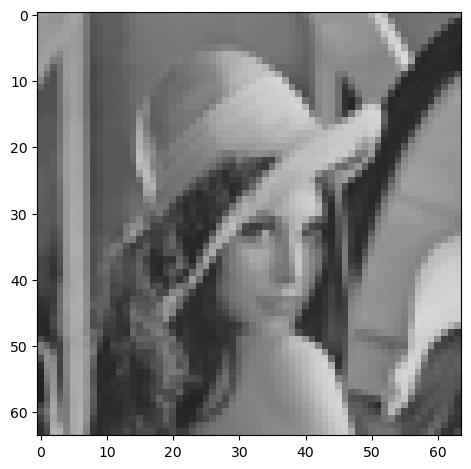

In [18]:
from skimage.io import imread, imshow
from skimage.transform import resize

lena = imread('figs/lena.jpg', as_gray=True)
lena_small = resize(lena, (64, 64), anti_aliasing=True)
imshow(lena_small)

In [19]:
lena_dft = dft2d(lena_small)
lena_dft_np = np.fft.fft2(lena_small)

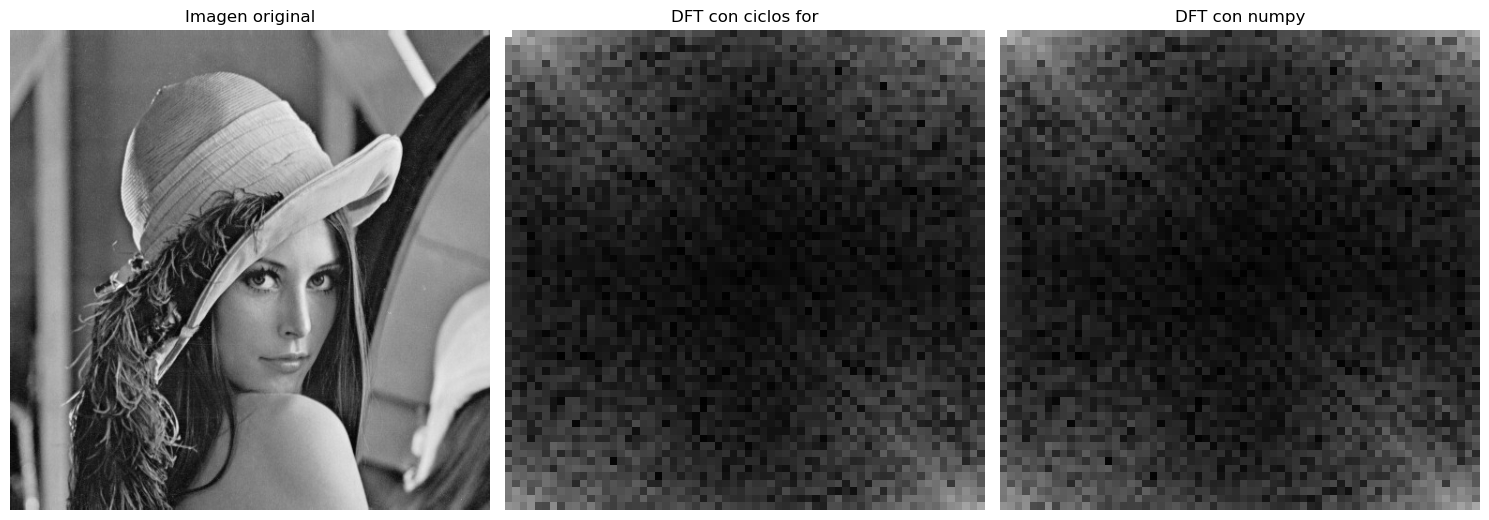

In [20]:
show_images(lena, np.log(1 + np.abs(lena_dft)), np.log(1 + np.abs(lena_dft_np)),
            titles=['Imagen original', 'DFT con ciclos for', 'DFT con numpy'],
            cols=3, figsize=(15, 15))

In [21]:
lena_idft = idft2d(lena_dft)
lena_idft_np = np.fft.ifft2(lena_dft)

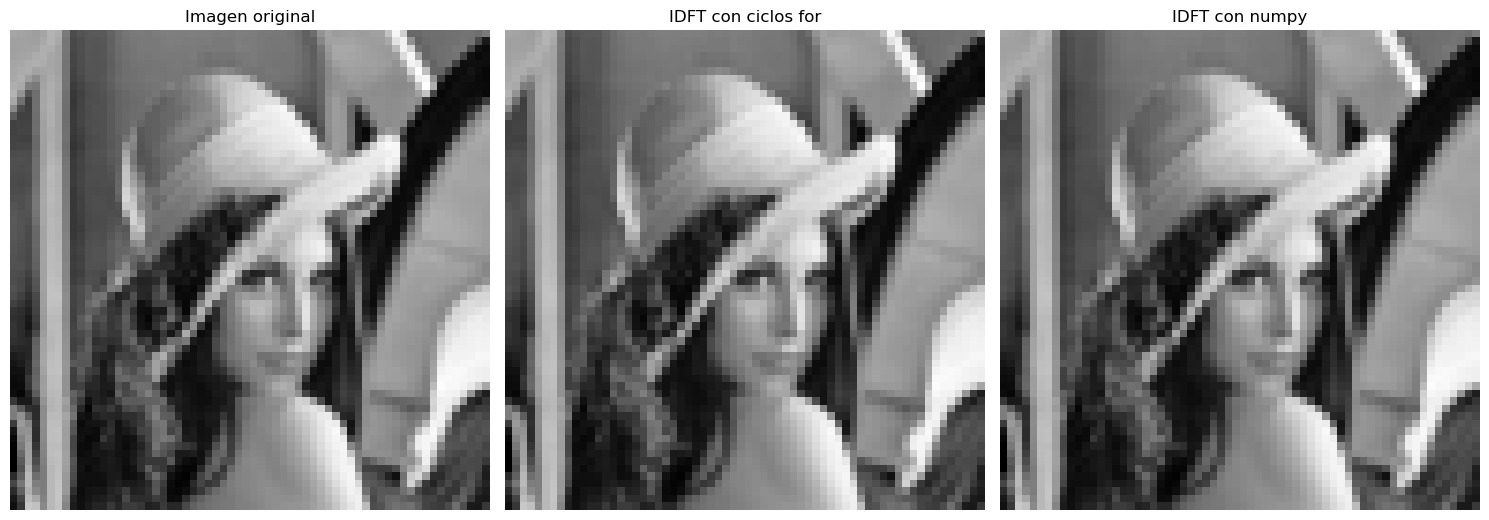

In [24]:
show_images(lena_small, np.abs(lena_idft), np.abs(lena_idft_np),
            titles=['Imagen original', 'IDFT con ciclos for', 'IDFT con numpy'],
            cols=3, figsize=(15, 15))

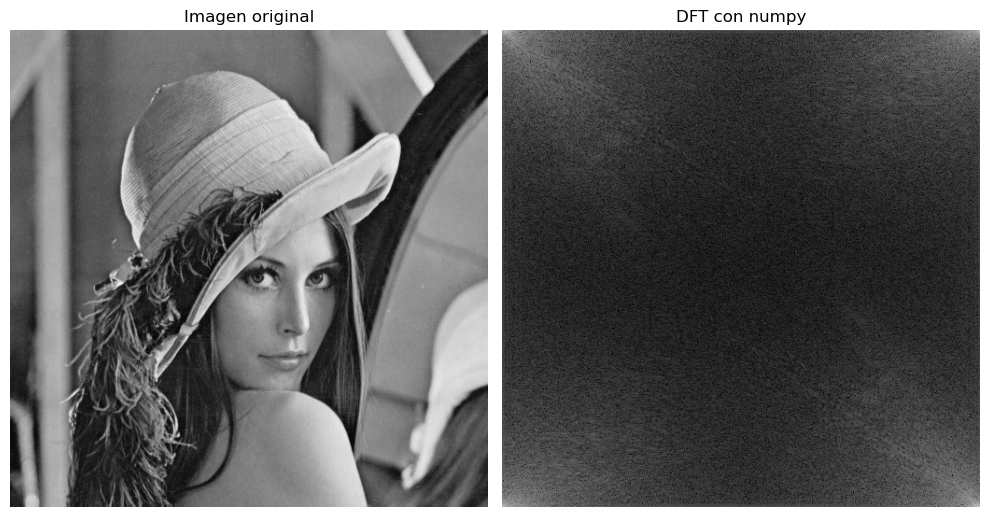

In [25]:
lena_dft = np.fft.fft2(lena)

show_images(lena, np.log(1 + np.abs(lena_dft)),
            titles=['Imagen original', 'DFT con numpy'],
            cols=2, figsize=(10, 10))

## 4.6. Propiedades de las DFT y IDFT en 2D

### 4.6.1. Espectro de Fourier y el ángulo de fase

Debido a que la DFT 2-D es compleja en general, se puede expresar en forma polar:
$$
\begin{aligned}
F(u, v) & =R(u, v)+j I(u, v) \\
& =|F(u,v)| e^{j \phi(u, v)}
\end{aligned}
$$
donde la magnitud
$$
|F(u, v)|= \sqrt{R^2(u, v)+I^2(u, v)}
$$
se llama *espectro de Fourier (o de frecuencia)*, y
$$
\phi(u, v)=\arctan \left[\frac{I(u, v)}{R(u, v)}\right]
$$
es el *ángulo de fase o espectro de fase*. 

Finalmente, el espectro de potencia se define como
$$
\begin{aligned}
P(u, v) & =|F(u, v)|^2 \\
& =R^2(u,v)+I^2(u,v)
\end{aligned}
$$

Como antes, $R$ e $I$ son las partes real e imaginaria de $F(u, v)$, y todos los cálculos se llevan a cabo para las variables discretas $u=0,1,2, \ldots, M- 1$ y $v=0,1,2, \ldots, N-1$. 

* Por lo tanto, $|F(u, v)|, \phi(u, v)$ y $P(u, v)$ son matrices de tamaño $M \times N$.

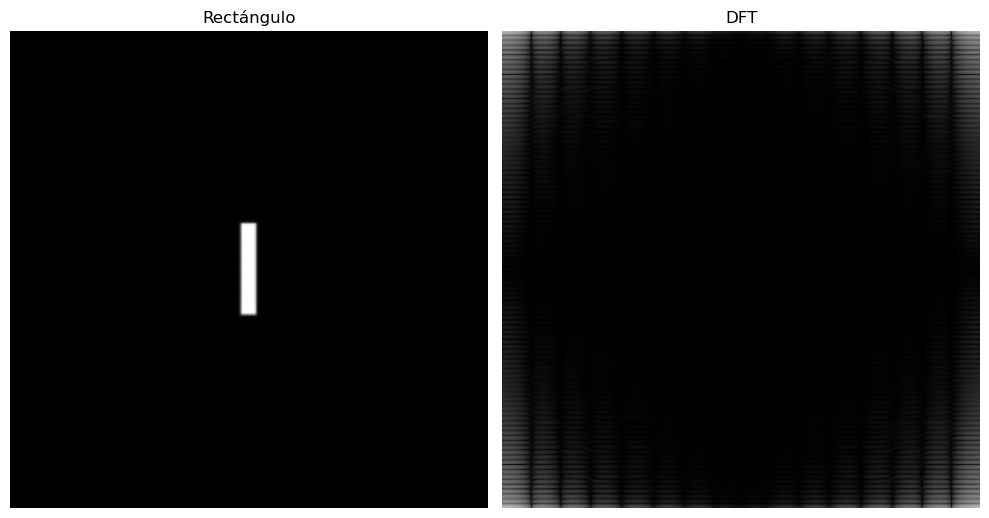

In [33]:
rect = imread('figs/rect.png', as_gray=True)
rect = resize(rect, (512, 512), anti_aliasing=True)

rect_dft = np.fft.fft2(rect)

show_images(rect, np.log(1 + np.abs(rect_dft)),
            titles=['Rectángulo', 'DFT'],
            cols=2, figsize=(10, 10))

Es evidente en la figura DFT que el área alrededor del origen de la transformación contiene los valores más altos (y por lo tanto aparece más brillante en la imagen). 

* Sin embargo, tenga en cuenta que las cuatro esquinas del espectro contienen valores igualmente altos. 

* Para centrar el espectro, simplemente multiplicamos la imagen en (a) por $(−1)^{x+y}$ antes de calcular la DFT. 


In [30]:
# funcion para realizar shift de la imagen
def shift(img):
    """
    Realizar shift de la imagen.
    Args:
        img (np.ndarray): La imagen de entrada.
    Returns:
        np.ndarray: La imagen con shift.
    """
    # obtener dimensiones de la imagen
    M, N = img.shape
    # inicializar la matriz de salida
    out = np.zeros((M, N), dtype=np.complex64)
    # realizar shift
    for x in range(M):
        for y in range(N):
            out[x, y] = img[x, y] * (-1) ** (x + y)
    # retornar la matriz de salida
    return out

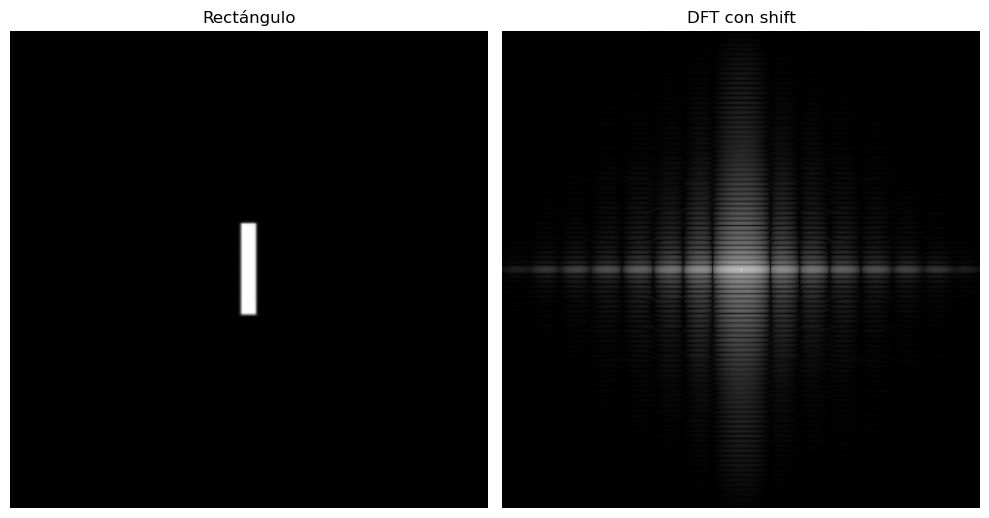

In [32]:
rect_dft_shift = np.fft.fft2(shift(rect))

show_images(rect, np.log(1 + np.abs(rect_dft_shift)),
            titles=['Rectángulo', 'DFT con shift'],
            cols=2, figsize=(10, 10))

La figura anterior muestra el resultado, que claramente es mucho más fácil de visualizar (obsérvese la simetría con respecto al punto central). 

Para resaltar los detalles, utilizamos la transformación logarítmica definida en la ecuación en la Unidad 3 con c = 1. 

$$
s = c \log(1+r)
$$

* La mayoría de los espectros que se muestran en esta unidad están escalados de esta manera.

El espectro es insensible a la traslación de la imagen (el valor absoluto del término exponencial es 1), pero gira en el mismo ángulo de una imagen rotada. 


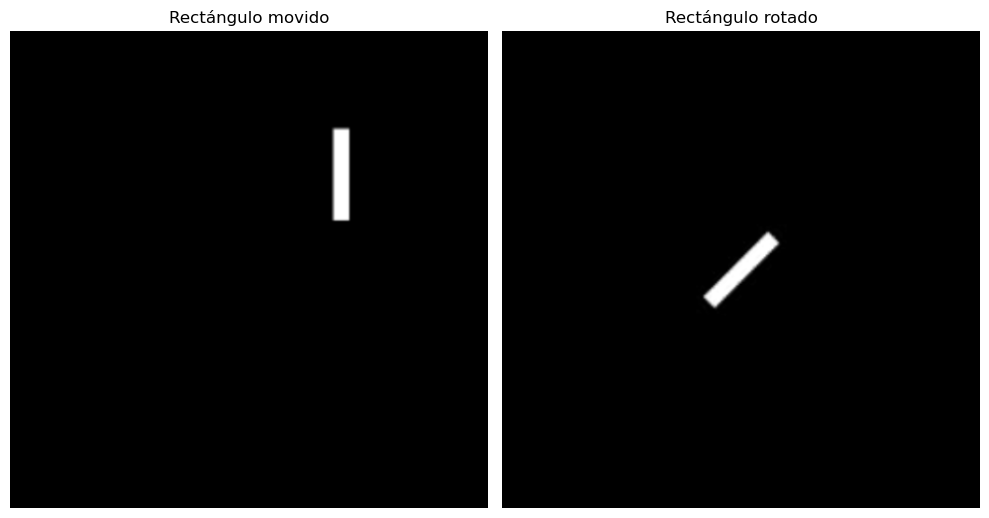

In [35]:
rect_movido = resize(imread('figs/rect_movido.png', as_gray=True), (512, 512))
rect_rotado = resize(imread('figs/rect_rotado.png', as_gray=True), (512, 512))

show_images(rect_movido, rect_rotado,
            titles=['Rectángulo movido', 'Rectángulo rotado'],
            cols=2, figsize=(10, 10))

Claramente, las imágenes de las "rect.png" y "rect_movido.png" son diferentes, por lo que, si sus espectros de Fourier son los mismos, entonces, sus ángulos de fase deben ser diferentes. 

In [46]:
# funcion para calcular el angulo de fase de la imagen
def phase(img):
    """
    Calcular el angulo de fase de una imagen.
    Args:
        img (np.ndarray): La imagen de entrada.
    Returns:
        np.ndarray: El angulo de fase de la imagen.
    """
    # obtener dimensiones de la imagen
    M, N = img.shape
    # inicializar la matriz de salida
    out = np.zeros((M, N), dtype=np.float32)
    # calcular el angulo de fase
    for x in range(M):
        for y in range(N):
            out[x, y] = np.angle(img[x, y])
    # retornar la matriz de salida
    return out

Las figuras siguientes lo confirman. 

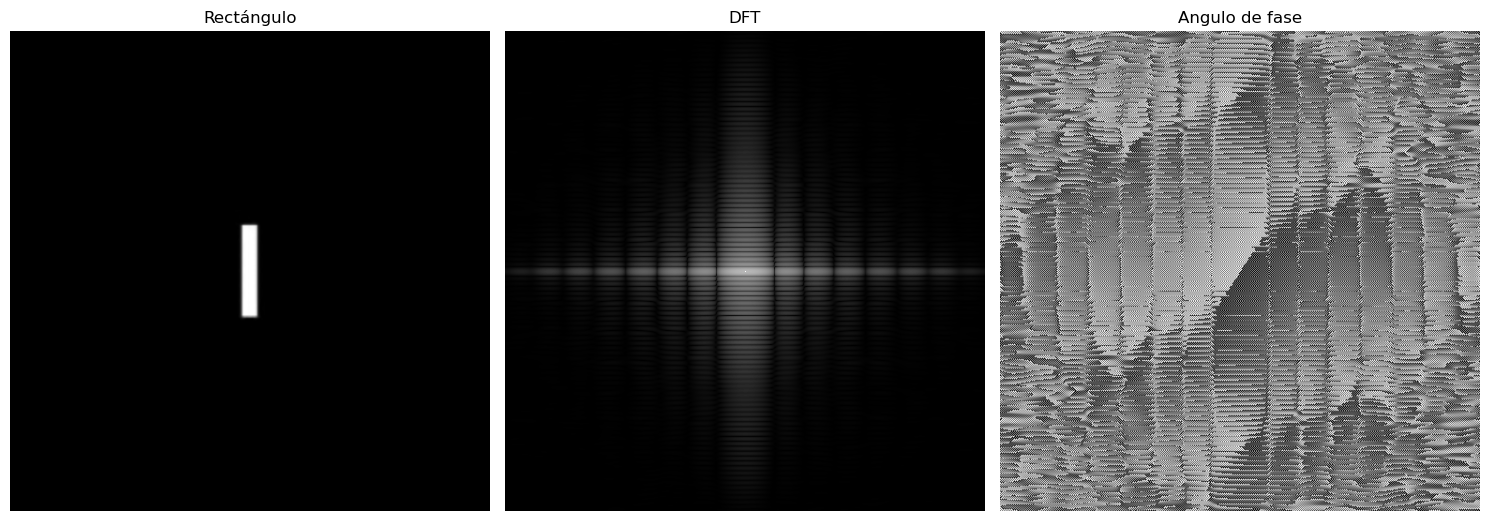

In [49]:
rect_dft_shift = np.fft.fft2(shift(rect))
rect_dft_shift_phase = phase(rect_dft_shift)

show_images(rect, np.log(1 + np.abs(rect_dft_shift)),rect_dft_shift_phase,
            titles=['Rectángulo', 'DFT', 'Angulo de fase'],
            cols=3, figsize=(15, 15))

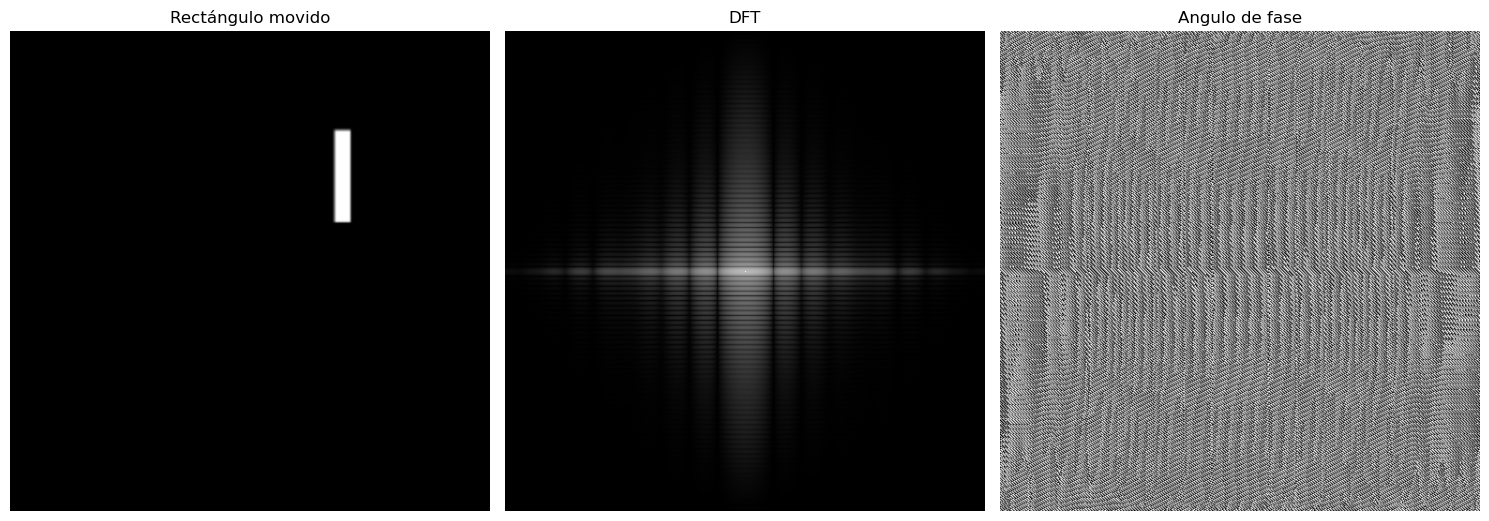

In [47]:
rect_movido_dft = np.fft.fft2(shift(rect_movido))
rect_movido_dft_phase = phase(rect_movido_dft)

show_images(rect_movido, np.log(1 + np.abs(rect_movido_dft)), rect_movido_dft_phase,
            titles=['Rectángulo movido', 'DFT', 'Angulo de fase'],
            cols=3, figsize=(15, 15))
            

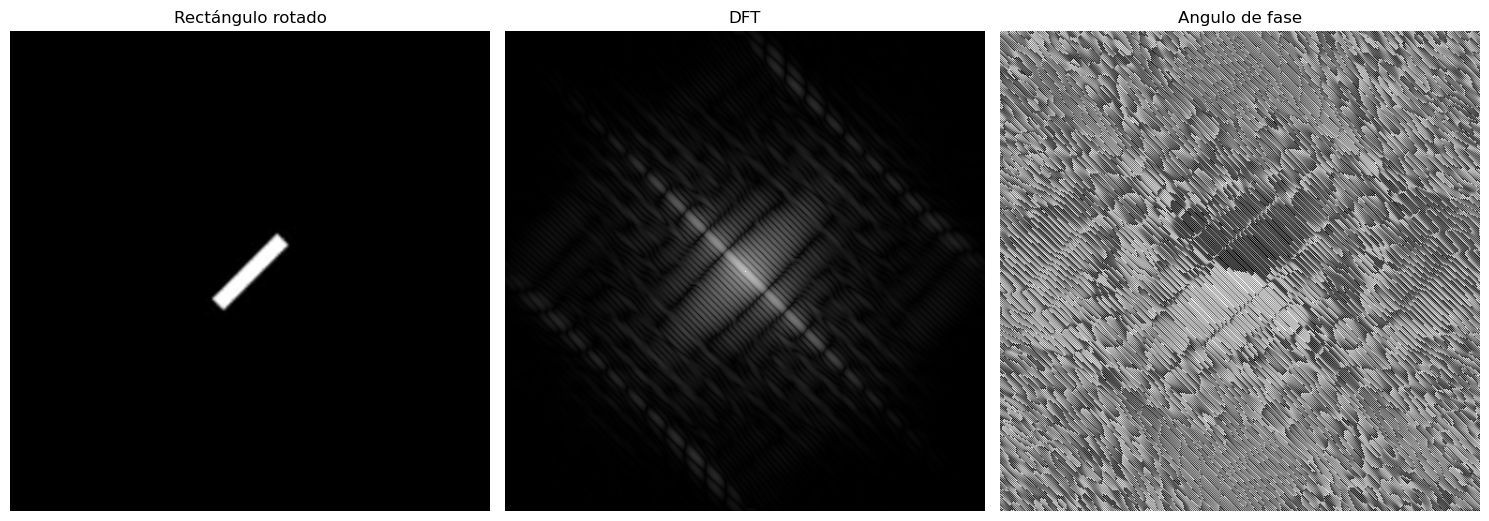

In [50]:
rect_rotado_dft = np.fft.fft2(shift(rect_rotado))
rect_rotado_dft_phase = phase(rect_rotado_dft)

show_images(rect_rotado, np.log(1 + np.abs(rect_rotado_dft)), rect_rotado_dft_phase,
            titles=['Rectángulo rotado', 'DFT', 'Angulo de fase'],
            cols=3, figsize=(15, 15))

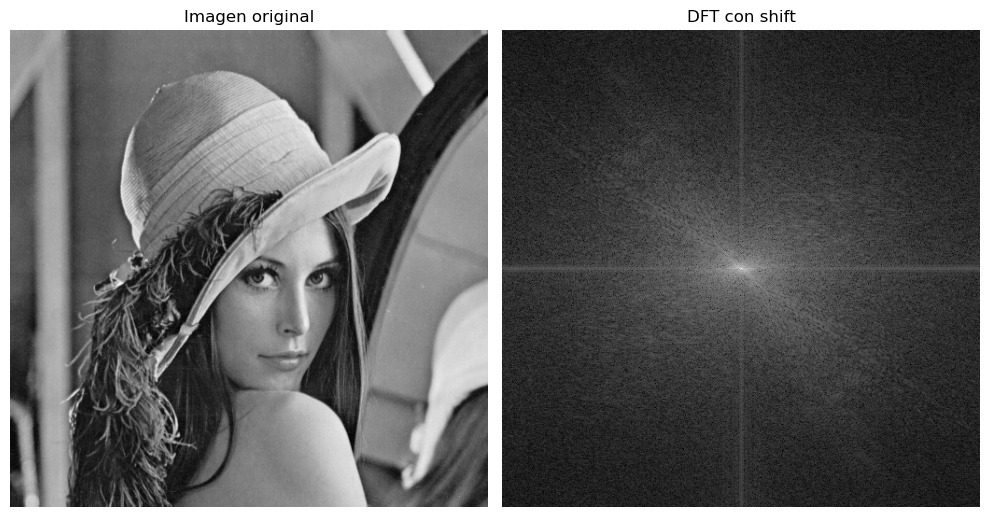

In [51]:
lena_dft_shift = np.fft.fft2(shift(lena))

show_images(lena, np.log(1 + np.abs(lena_dft_shift)),
            titles=['Imagen original', 'DFT con shift'],
            cols=2, figsize=(10, 10))

### 4.6.2. El teorema de convolución 2D discreta

Ampliando la convolución a dos variables da como resultado la siguiente expresión para convolución circular 2-D:
$$
(f \star h)(x, y)=\sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) h(x-m, y-n)
$$
para $x=0,1,2, \ldots, M-1$ y $y=0,1,2, \ldots, N-1$. Como en la ecuación. (4-48), ecuación. (4-94) da un período de una secuencia periódica 2-D. 

El teorema de convolución 2-D viene dado por:
$$
(f \star h)(x, y) \Leftrightarrow(F \cdot H)(u, v)
$$
y por el contrario,
$$
(f \cdot h)(x, y) \Leftrightarrow \frac{1}{M N}(F \star H)(u, v)
$$
donde $F$ y $H$ son las transformadas de Fourier de $f$ y $h$, respectivamente. 

Como antes, la flecha doble se utiliza para indicar que los lados izquierdo y derecho de las expresiones constituyen un par de transformada de Fourier. 

* Nuestro interés en el resto de esta unidad está en la ecuación, que establece que la transformada de Fourier de la convolución espacial de $f$ y $h$, es el producto de sus transformadas. 

* De manera similar, la DFT inversa del producto $(F \cdot H)(u, v)$ produce $(f \star h)(x, y)$.

## 4.7. Bases para filtrado en el dominio de la frecuencia

### 4.7.1. Fundamentos

### 4.7.2. Pasos para el filtrado en el dominio de la frecuencia

El proceso de filtrado en el dominio de la frecuencia se puede resumir de la siguiente manera:

1. Dada una imagen de entrada $f(x,y)$ de tamaño $M × N$, obtenga los tamaños de relleno  $P = 2M$ y $Q = 2N$.

2. A partir de la imagen rellenada $f_p(x, y)$ de tamaño $P \times Q$ usando relleno cero, espejo o réplica.

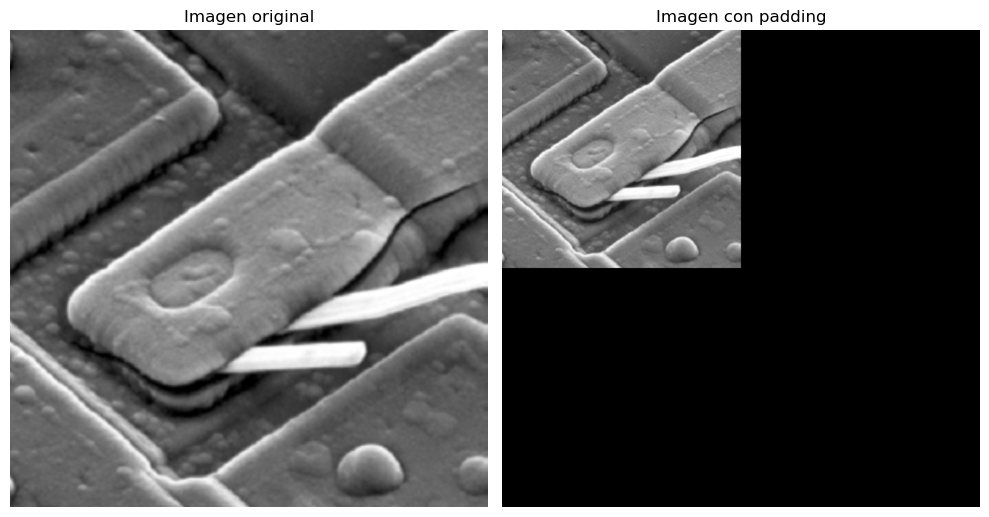

1024 1024


In [59]:
size = 512
f = resize(imread('figs/electronic.png', as_gray=True), (size, size))
f_p = np.pad(f, ((0,size), (0, size)), 'constant')

P, Q = f_p.shape

show_images(f, f_p,
            titles=['Imagen original', 'Imagen con padding'],
            cols=2, figsize=(10, 10))

print(P, Q)

3. Multiplique $f_p(x, y)$ por $(-1)^{x+y}$ para centrar la transformada de Fourier en el rectángulo de frecuencia $P \times Q$.

4. Calcule el DFT, $F(u, v)$, de la imagen del Paso 3.

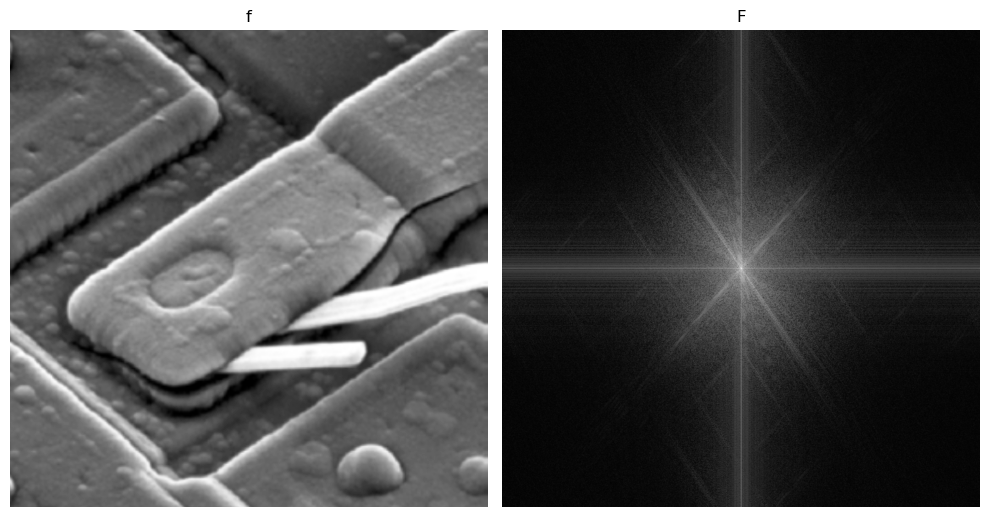

In [62]:
F = np.fft.fft2(shift(f_p))

show_images(f, np.log(1 + np.abs(F)),
            titles=['f', 'F'],
            cols=2, figsize=(10, 10))

5. Construya una función de transferencia de filtro simétrica real, $H(u, v)$, de tamaño $P \times Q$ con centro en $(P / 2, Q / 2)$.

In [63]:
# crear funcion de transferencia H gaussiano
def H_gaussiano(P, Q, sigma=10):
    """
    Crear la funcion de transferencia H gaussiano.
    Args:
        P (int): El numero de filas de la imagen.
        Q (int): El numero de columnas de la imagen.
        sigma (float): El valor de sigma (default=10).
    Returns:
        np.ndarray: La funcion de transferencia H gaussiano.
    """
    # inicializar la matriz de salida
    out = np.zeros((P, Q), dtype=np.complex64)
    # calcular la funcion de transferencia
    for u in range(P):
        for v in range(Q):
            out[u, v] = np.exp(-((u - P / 2) ** 2 + (v - Q / 2) ** 2) / (2 * sigma ** 2))
    # retornar la matriz de salida
    return out

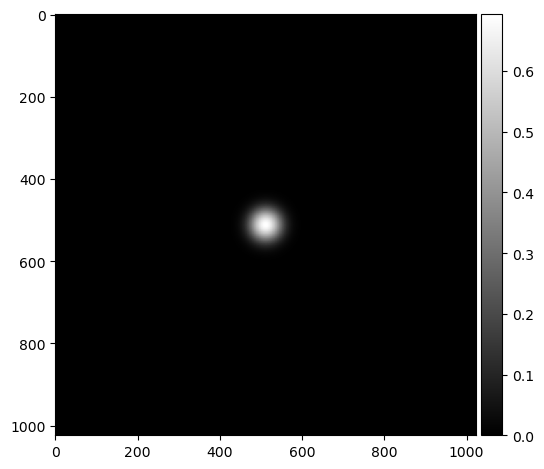

In [91]:
H = H_gaussiano(P, Q, 25)

imshow(np.log(1 + np.abs(H)), cmap='gray')

6. Forme el producto $G(u, v)=H(u, v) F(u, v)$ usando la multiplicación por elementos; es decir, $G(i, k)=H(i, k) F(i, k)$ para $i=0,1,2, \ldots, M-1$ y $k=0,1,2 , \ldots, N-1$.

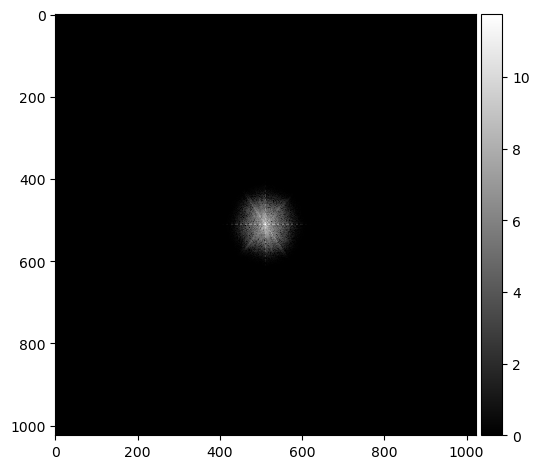

In [92]:
G = F * H

imshow(np.log(1 + np.abs(G)), cmap='gray')

7. Obtenga la imagen filtrada (de tamaño $P \times Q$ ) calculando el IDFT de $G(u, v)$ :
$$
g_p(x, y)=\left(\operatorname{real}\left[\Im^{-1}\{G(u, v)\}\right]\right)(-1)^{x+y }
$$



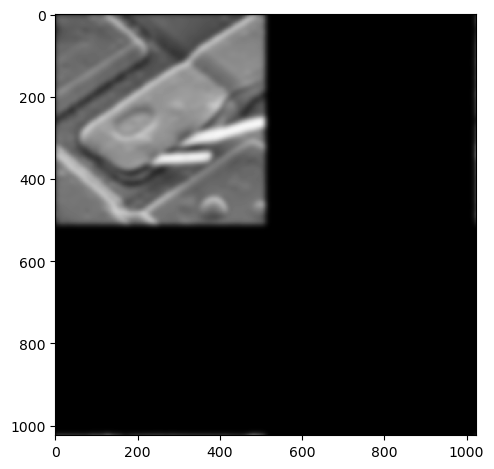

In [93]:
g_p = np.fft.ifft2(G)

imshow(np.abs(g_p), cmap='gray')

8. Obtenga el resultado final filtrado, $g(x, y)$, del mismo tamaño que la imagen de entrada, extrayendo la región $M \times N$ del cuadrante superior izquierdo de $g_p(x, y) $.

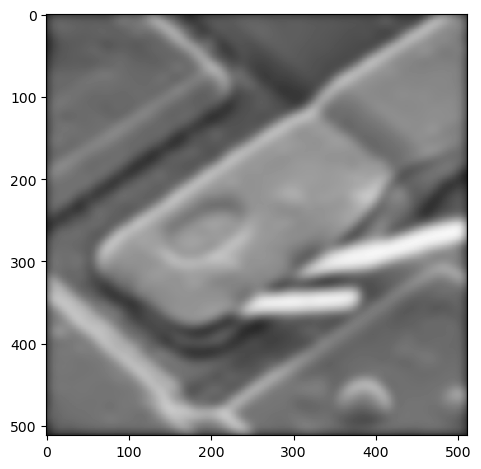

In [94]:
g = g_p[:size, :size]

imshow(np.abs(g), cmap='gray')

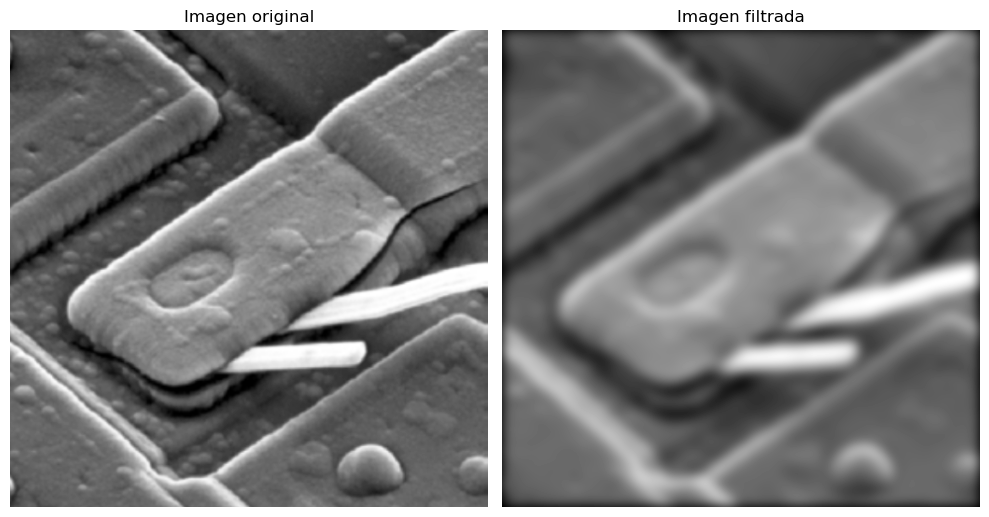

In [95]:
show_images(f, np.abs(g),
            titles=['Imagen original', 'Imagen filtrada'],
            cols=2, figsize=(10, 10))

### 4.7.3. Correspondencia entre el filtrado en los dominios espacial y de frecuencia

## 4.8. Filtros pasa bajas en el dominio de la frecuencia

### 4.8.1. Filtro pasa bajas ideal

### 4.8.2. Filtro pasa bajas Gaussiano

### 4.8.3. Filtro pasa bajas de Butterworth

## 4.9. Filtros pasa altas en el dominio de la frecuencia

### 4.9.1. Filtros pasa altas ideal, Gaussiano y de Butterworth, a partir de filtros pasa bajas

### 4.9.2. El Laplaciano en el dominio de la frecuencia

### 4.9.3. Enmascaramiento de enfoque, filtrado de alto aumento y filtrado de énfasis de alta frecuencia

### 4.9.4. Filtrado homomórfico

## 4.10. Filtrado selectivo

### 4.10.1. Filtros pasa banda y rechaza banda

### 4.10.2. Filtros de muesca

## 4.11. La transformada rápida de Fourier (FFT)

### 4.11.1. Separabilidad

### 4.11.2. Calculando la IDFT utilizando el algortimo de DFT

### 4.11.3. La transformada rápida

# Fin de la Unidad 4